# Weapon Damage Per Turn

## Setting Up

In [1]:
import pandas as pd
from weapon import max_shots, burst

weapon_stats = pd.read_csv("datasets/weapon_stats.csv")
ammo_stats = pd.read_csv("datasets/ammo_stats.csv")
weapon_firemodes = pd.read_csv("datasets/weapon_firemodes.csv")
damage_modifiers = pd.read_csv("datasets/damage_modifiers.csv")

## Data Merge

In [2]:
weapon_attacks = weapon_stats.merge(ammo_stats, on="weapon")
weapon_attacks = weapon_attacks.merge(weapon_firemodes, on="weapon")
weapon_attacks = weapon_attacks.sort_values(by=["weapon", "fire_mode"])
weapon_attacks.head()

,weapon,grip,ammo,damage,damage_type,capacity,fire_mode,time_units,accuracy
47,alien_grenade,1,alien_grenade,90,high_explosive,1.0,grenade,75,65
13,auto_cannon,2,auto_cannon_ap,42,armor_piercing,14.0,aimed,80,82
16,auto_cannon,2,auto_cannon_he,44,high_explosive,14.0,aimed,80,82
19,auto_cannon,2,auto_cannon_inc,48,incendiary,14.0,aimed,80,82
11,auto_cannon,2,auto_cannon_ap,42,armor_piercing,14.0,auto,40,32


## Chance to Hit

We will use an average Accuracy of 50. Meaning the soldier fails half of the time.

The chance of hit formula is simple. Just multiply the soldier's accuracy chance by the weapon's accuracy chance. So an average of 50 to a weapon of Accuracy 90 means 0.50 * 0.9 = 0.45 chance of hit.

In [3]:
weapon_attacks["chance_to_hit"] = weapon_attacks.apply(lambda x: x["accuracy"] / 100 * 0.50, axis=1)
weapon_attacks.head()

,weapon,grip,ammo,damage,damage_type,capacity,fire_mode,time_units,accuracy,chance_to_hit
47,alien_grenade,1,alien_grenade,90,high_explosive,1.0,grenade,75,65,0.325
13,auto_cannon,2,auto_cannon_ap,42,armor_piercing,14.0,aimed,80,82,0.410
16,auto_cannon,2,auto_cannon_he,44,high_explosive,14.0,aimed,80,82,0.410
19,auto_cannon,2,auto_cannon_inc,48,incendiary,14.0,aimed,80,82,0.410
11,auto_cannon,2,auto_cannon_ap,42,armor_piercing,14.0,auto,40,32,0.160


## Derived Damage

In [4]:
# weapon_attacks = weapon_attacks.apply(burst, axis=1)
weapon_attacks["burst"] = weapon_attacks.apply(burst, axis=1)
weapon_attacks["turn_max_shots"] = weapon_attacks.apply(max_shots, axis=1)
weapon_attacks["turn_damage_max"] = weapon_attacks.apply(lambda x: x["turn_max_shots"] * x["damage"], axis=1)
weapon_attacks["turn_damage_expected"] = weapon_attacks.apply(lambda x: x["turn_damage_max"] * x["chance_to_hit"], axis=1)
weapon_attacks.head()

,weapon,grip,ammo,damage,damage_type,capacity,fire_mode,time_units,accuracy,chance_to_hit,burst,turn_max_shots,turn_damage_max,turn_damage_expected
47,alien_grenade,1,alien_grenade,90,high_explosive,1.0,grenade,75,65,0.325,1,1,90,29.25
13,auto_cannon,2,auto_cannon_ap,42,armor_piercing,14.0,aimed,80,82,0.410,1,1,42,17.22
16,auto_cannon,2,auto_cannon_he,44,high_explosive,14.0,aimed,80,82,0.410,1,1,44,18.04
19,auto_cannon,2,auto_cannon_inc,48,incendiary,14.0,aimed,80,82,0.410,1,1,48,19.68
11,auto_cannon,2,auto_cannon_ap,42,armor_piercing,14.0,auto,40,32,0.160,3,6,252,40.32


## Damage Ranking

### Most Damaging Weapon

In a single turn, shooting as much as possible, which weapon does the most damage.

This takes into account reloading.

In [5]:
most_damaging_weapon_average = weapon_attacks[["weapon", "turn_damage_expected"]]
most_damaging_weapon_average = most_damaging_weapon_average.groupby("weapon").mean()

In [6]:
most_damaging_weapon_max = weapon_attacks[["weapon", "turn_damage_expected"]]
most_damaging_weapon_max = most_damaging_weapon_max.groupby("weapon").max()

In [7]:
most_damaging_weapon = most_damaging_weapon_max.merge(most_damaging_weapon_average, on="weapon")
most_damaging_weapon = most_damaging_weapon.rename(columns={"turn_damage_expected_x": "max", "turn_damage_expected_y": "average"})
most_damaging_weapon = most_damaging_weapon.sort_values(by=["average"])
most_damaging_weapon

,max,average
weapon,,
grenade,16.250,16.250000
proximity_grenade,22.750,22.750000
rifle,36.000,28.000000
alien_grenade,29.250,29.250000
auto_cannon,46.080,32.904444
pistol,39.000,34.710000
high_explosive,35.750,35.750000
rocket_launcher,57.500,37.541667
heavy_cannon,54.000,37.800000


Text(0, 0.5, 'Damage')

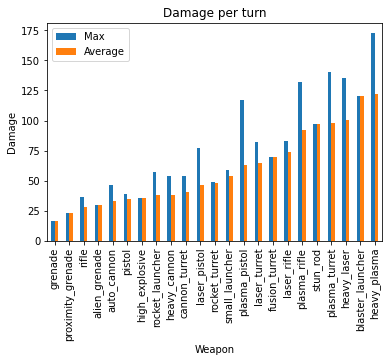

In [8]:
ax = most_damaging_weapon.plot.bar(title="Damage per turn", legend=False)
ax.legend(["Max", "Average"])
ax.set_xlabel("Weapon")
ax.set_ylabel("Damage")

### Most Damaging Snapshot

In [9]:
most_damaging_weapon_snap_average = weapon_attacks[weapon_attacks["fire_mode"] == "snapshot"]
most_damaging_weapon_snap_average = most_damaging_weapon_snap_average[["weapon", "turn_damage_expected"]]
most_damaging_weapon_snap_average = most_damaging_weapon_snap_average.groupby("weapon").mean()

In [10]:
most_damaging_weapon_snap_max = weapon_attacks[weapon_attacks["fire_mode"] == "snapshot"]
most_damaging_weapon_snap_max = most_damaging_weapon_snap_max[["weapon", "turn_damage_expected"]]
most_damaging_weapon_snap_max = most_damaging_weapon_snap_max.groupby("weapon").max()

In [11]:
most_damaging_weapon_snap = most_damaging_weapon_snap_max.merge(most_damaging_weapon_snap_average, on="weapon")
most_damaging_weapon_snap = most_damaging_weapon_snap.rename(columns={"turn_damage_expected_x": "max", "turn_damage_expected_y": "average"})
most_damaging_weapon_snap = most_damaging_weapon_snap.sort_values(by=["average"])
most_damaging_weapon_snap

,max,average
weapon,,
rocket_launcher,27.500,24.291667
rifle,36.000,36.000000
auto_cannon,40.320,37.520000
pistol,39.000,39.000000
laser_pistol,46.000,46.000000
laser_turret,46.750,46.750000
rocket_turret,46.750,46.750000
heavy_cannon,54.000,50.400000
plasma_pistol,50.700,50.700000


Text(0, 0.5, 'Damage')

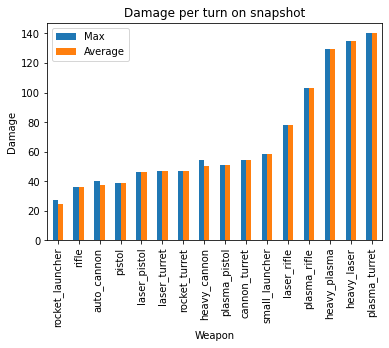

In [12]:
ax = most_damaging_weapon_snap.plot.bar(title="Damage per turn on snapshot", legend=False)
ax.legend(["Max", "Average"])
ax.set_xlabel("Weapon")
ax.set_ylabel("Damage")

### Most Damaging Aimed

In [13]:
most_damaging_weapon_aim_average = weapon_attacks[weapon_attacks["fire_mode"] == "aimed"]
most_damaging_weapon_aim_average = most_damaging_weapon_aim_average[["weapon", "turn_damage_expected"]]
most_damaging_weapon_aim_average = most_damaging_weapon_aim_average.groupby("weapon").mean()

In [14]:
most_damaging_weapon_aim_max = weapon_attacks[weapon_attacks["fire_mode"] == "aimed"]
most_damaging_weapon_aim_max = most_damaging_weapon_aim_max[["weapon", "turn_damage_expected"]]
most_damaging_weapon_aim_max = most_damaging_weapon_aim_max.groupby("weapon").max()

In [15]:
most_damaging_weapon_aim = most_damaging_weapon_aim_max.merge(most_damaging_weapon_aim_average, on="weapon")
most_damaging_weapon_aim = most_damaging_weapon_aim.rename(columns={"turn_damage_expected_x": "max", "turn_damage_expected_y": "average"})
most_damaging_weapon_aim = most_damaging_weapon_aim.sort_values(by=["average"])
most_damaging_weapon_aim

,max,average
weapon,,
laser_pistol,15.640,15.640000
rifle,16.500,16.500000
auto_cannon,19.680,18.313333
plasma_pistol,22.100,22.100000
heavy_cannon,27.000,25.200000
cannon_turret,27.000,27.000000
pistol,30.420,30.420000
plasma_rifle,40.000,40.000000
rocket_turret,48.875,48.875000


Text(0, 0.5, 'Damage')

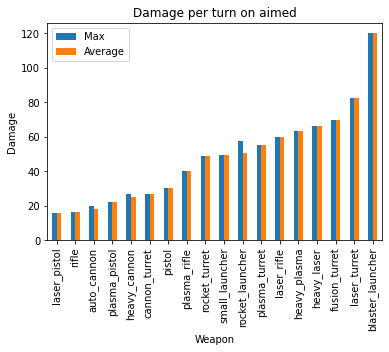

In [16]:
ax = most_damaging_weapon_aim.plot.bar(title="Damage per turn on aimed", legend=False)
ax.legend(["Max", "Average"])
ax.set_xlabel("Weapon")
ax.set_ylabel("Damage")

### Most Damaging Auto

In [17]:
most_damaging_weapon_auto_average = weapon_attacks[weapon_attacks["fire_mode"] == "auto"]
most_damaging_weapon_auto_average = most_damaging_weapon_auto_average[["weapon", "turn_damage_expected"]]
most_damaging_weapon_auto_average = most_damaging_weapon_auto_average.groupby("weapon").mean()

In [18]:
most_damaging_weapon_auto_max = weapon_attacks[weapon_attacks["fire_mode"] == "auto"]
most_damaging_weapon_auto_max = most_damaging_weapon_auto_max[["weapon", "turn_damage_expected"]]
most_damaging_weapon_auto_max = most_damaging_weapon_auto_max.groupby("weapon").max()

In [19]:
most_damaging_weapon_auto = most_damaging_weapon_auto_max.merge(most_damaging_weapon_auto_average, on="weapon")
most_damaging_weapon_auto = most_damaging_weapon_auto.rename(columns={"turn_damage_expected_x": "max", "turn_damage_expected_y": "average"})
most_damaging_weapon_auto = most_damaging_weapon_auto.sort_values(by=["average"])
most_damaging_weapon_auto

,max,average
weapon,,
rifle,31.50,31.50
auto_cannon,46.08,42.88
laser_pistol,77.28,77.28
laser_rifle,82.80,82.80
plasma_pistol,117.00,117.00
plasma_rifle,132.00,132.00
heavy_plasma,172.50,172.50


Text(0, 0.5, 'Damage')

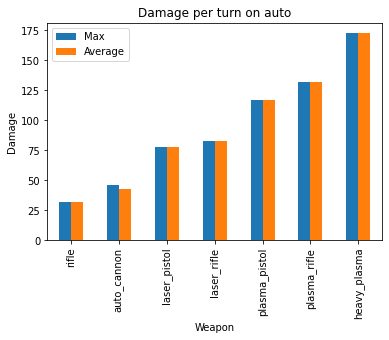

In [20]:
ax = most_damaging_weapon_auto.plot.bar(title="Damage per turn on auto", legend=False)
ax.legend(["Max", "Average"])
ax.set_xlabel("Weapon")
ax.set_ylabel("Damage")

### Most Damaging Grenade

In [21]:
most_damaging_weapon_grenade = weapon_attacks[weapon_attacks["fire_mode"] == "grenade"]
most_damaging_weapon_grenade = most_damaging_weapon_grenade[["weapon", "turn_damage_expected"]]
most_damaging_weapon_grenade = most_damaging_weapon_grenade.rename(columns={"turn_damage_expected": "turn_damage"})
most_damaging_weapon_grenade = most_damaging_weapon_grenade.set_index(["weapon"])
most_damaging_weapon_grenade = most_damaging_weapon_grenade.sort_values(by=["turn_damage"])
most_damaging_weapon_grenade

,turn_damage
weapon,
grenade,16.25
proximity_grenade,22.75
alien_grenade,29.25
high_explosive,35.75


Text(0, 0.5, 'Damage')

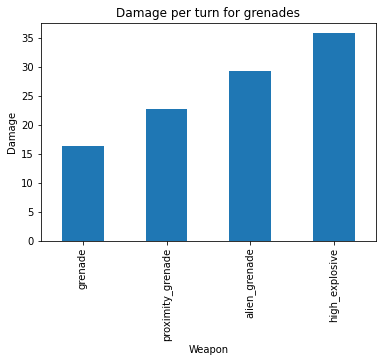

In [22]:
ax = most_damaging_weapon_grenade.plot.bar(title="Damage per turn for grenades", legend=False)
ax.set_xlabel("Weapon")
ax.set_ylabel("Damage")